In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test), = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train = y_train.reshape (-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

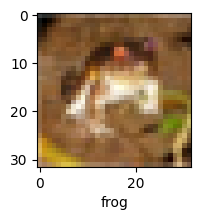

In [11]:
plot_sample(X_train, y_train, 0)

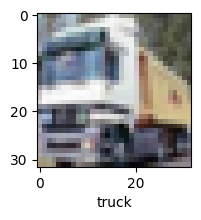

In [12]:
plot_sample(X_train, y_train, 1)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
ann = models.Sequential([
 layers.Flatten(input_shape=(32,32,3)),
 layers.Dense(3000, activation='relu'),
 layers.Dense(1000, activation='relu'),
 layers.Dense(10, activation='softmax') 
 ])
ann.compile(optimizer='SGD',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=1)


1563/1563 [==============================] - 111s 70ms/step - loss: 1.8130 - accuracy: 0.3530


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report : \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 21ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.47      0.51      0.49      1000
           1       0.23      0.83      0.36      1000
           2       0.47      0.02      0.04      1000
           3       0.40      0.13      0.20      1000
           4       0.43      0.31      0.36      1000
           5       0.40      0.24      0.30      1000
           6       0.50      0.40      0.44      1000
           7       0.32      0.55      0.40      1000
           8       0.76      0.18      0.29      1000
           9       0.43      0.37      0.40      1000

    accuracy                           0.35     10000
   macro avg       0.44      0.35      0.33     10000
weighted avg       0.44      0.35      0.33     10000



In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [20]:
cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 5)

In [ ]:
cnn.evaluate(X_test, y_test)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot_sample(X_test, y_test, 3)

In [ ]:
classes[y_classes[3]]

In [ ]:
classes[y_classes[9]]